Binary Classification of Loan Repayment Ability: Decision Tree vs. Logistic Regression

Decision Trees

Import our dataset

In [2]:
import pandas as pd

df = pd.read_csv('loan_data_set.csv') 

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Exploring our Data

In [4]:
df.info() #We have a lot of object data types which we will have to check and deal with later 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Check for missing values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#check the shape of the data
df.shape # the datset is not big, having 614 row and 13 columns - let's find away to deal with the missing data without removing - mode, mean, median

(614, 13)

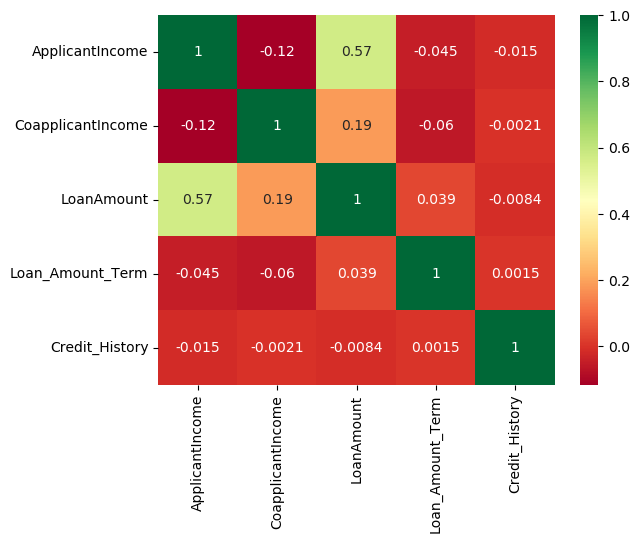

In [7]:
#Before we start working on the missing data, lets see what variables have a strong correlation with our dependent variable - 'Loan_Status'
#If an indenpendent variable has little to no correlation with our target variable - we could possibly remove it and save us some time

import seaborn as sns #importing seaborn to access a heatmap
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn') #The seaborn will only map the numerical variables - lets one hot encode out target variable to 0 for No and 1 for yes

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
vmap = {'N':0, 'Y':1} 

df['Loan_Status'] = df['Loan_Status'].map(vmap) #Mapping 0 to 'No' and 1 to 'Y'

In [10]:
df['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [11]:
#Let's check Loan_Status dtype
df['Loan_Status'].dtype

dtype('int64')

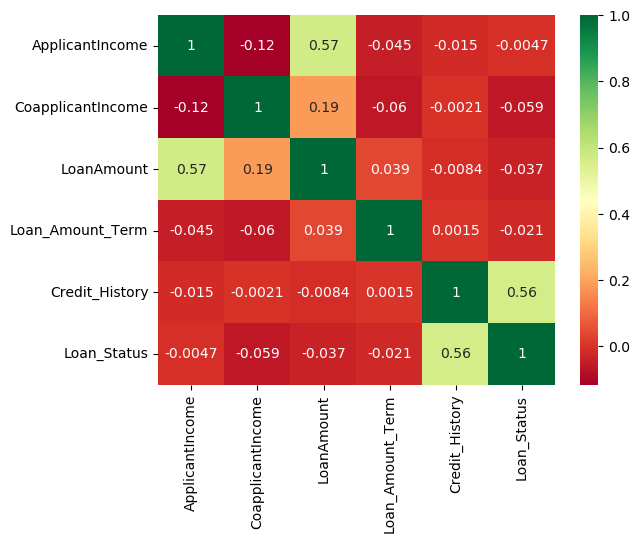

In [12]:
#Now that Loan_Status is a integer, lets run seaborn again
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

Let's start dealing with the missing values in our dataset and check for outliers

In [13]:
#Gender is missing 13 values
df['Gender'].value_counts() 

# we can see that there is 4 to 1 split in favour of male applicants - so we can use mode, mean is not an option as we will be mapping the genders to 0 or 1

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [15]:
df['Gender'].isnull().sum()

0

In [16]:
#Drop loan_ID as this will have no impact on our result
df.drop('Loan_ID',axis=1,inplace=True) # high cardinality

In [17]:
df.shape

(614, 12)

In [18]:
#Let's check the married Independent variable with 3 missing data entrys
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [19]:
df['Married'].head(10)

0     No
1    Yes
2    Yes
3    Yes
4     No
5    Yes
6    Yes
7    Yes
8    Yes
9    Yes
Name: Married, dtype: object

In [20]:
#Let's drop NaN rows for Married
df.dropna(subset=['Married'],inplace=True)

In [21]:
df['Married'].isnull().sum() #Now we have no missing values

0

In [22]:
#Lets map 'No' to 0 and "Yes' to 1 for the aried indepdendent variable
mmap = {'No':0, 'Yes':1} 

df['Married'] = df['Married'].map(mmap) #Mapping 0 to 'No' and 1 to 'Y'

In [23]:
df['Married'].head()

0    0
1    1
2    1
3    1
4    0
Name: Married, dtype: int64

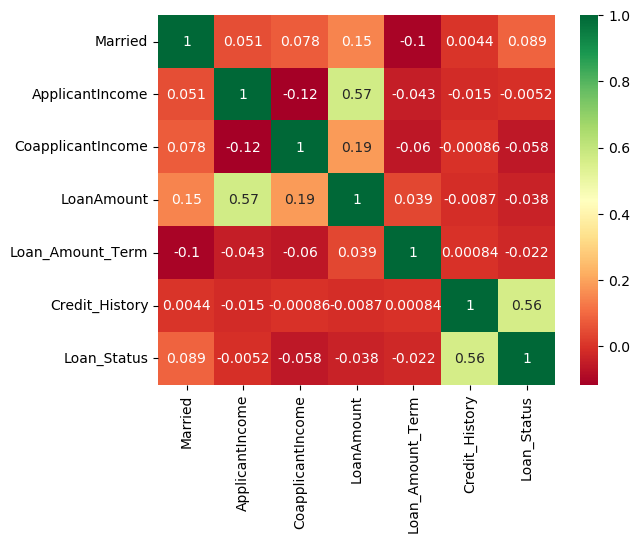

In [24]:
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn') #lets run a heatmap coorelation again to check if we should keep married independent variable

In [25]:
#Okay whats next - lets check the total NaN values
df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df['Married'].value_counts()

1    398
0    213
Name: Married, dtype: int64

In [27]:
#Now on to Dependents variable
df['Dependents'].isnull().sum()

12

In [28]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
df['Dependents'].head(15) #print the first 5 rows - Note: this variable is an object data type

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7     3+
8      2
9      1
10     2
11     2
12     2
13     0
14     2
Name: Dependents, dtype: object

In [30]:
#Before we convert our Dependents column - we must deal with the 3+ values
#if we have convert our 3+ now to an interger they will show as a NaN value and get mixed in with our current NaN values
#We will change our '3+' entries to 99
df['Dependents'] = df['Dependents'].replace('3+','99')

In [31]:
#Let's convert the column Dependents to an integer
#Converting an object column with NaN values to integers can be a bit tricky when using pandas - we use a nulaable integer type
#Numpy inetgers like int6464 do not support NaN values.
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').astype('Int64')

In [32]:
#df['Dependents'] = df['Dependents'].astype(int)

#I have tried changing the data type to an int but 3+ will cause an issue
#I will try map the 3+ value to a random list between 4 and 8 assign these values
#23 can see the 99 which we changed in previous code
df['Dependents'].head(10)

0     0
1     1
2     0
3     0
4     0
5     2
6     0
7    99
8     2
9     1
Name: Dependents, dtype: Int64

In [33]:
df['Dependents'].isnull().sum() #after converting the Dependents column we have 60 NaN values which represent our 3+

12

In [34]:
#I want to fill the mean missing values with the mean but I first want to replace by 3+ values with a random number between 3 and 8

import random #importing random module to use for randoming choosing a number between 3 and 8

df['Dependents'] = df['Dependents'].apply(
    lambda x: (random.randint(3,9)) if not pd.isna(x) and x == 99 else x # if not pd.isna(x) -  checks is value is not a NaN and where x = 99
)

In [35]:
df['Dependents'].head(10) #We can see our 3+ entries have been changed to a random int between 3 and 8

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    4
8    2
9    1
Name: Dependents, dtype: object

In [36]:
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').astype('Int64') #for some reason the df['Dependents'] is still showing as dtype: object - let's change that

In [37]:
df['Dependents'].dtype

Int64Dtype()

In [38]:
df['Dependents'].head(10)

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    4
8    2
9    1
Name: Dependents, dtype: Int64

In [39]:
#fill the missing values with the mean
#df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mean())

#I get an error runing the code above so I will use the round method and change the data type
# Fill NaNs with the mean, rounded to nearest whole number
mean_val = round(df['Dependents'].mean())
df['Dependents'] = df['Dependents'].fillna(mean_val)

# Convert to int64
df['Dependents'] = df['Dependents'].astype('int64')

In [40]:
#check for Null values
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             611 non-null    object 
 1   Married            611 non-null    int64  
 2   Dependents         611 non-null    int64  
 3   Education          611 non-null    object 
 4   Self_Employed      579 non-null    object 
 5   ApplicantIncome    611 non-null    int64  
 6   CoapplicantIncome  611 non-null    float64
 7   LoanAmount         590 non-null    float64
 8   Loan_Amount_Term   597 non-null    float64
 9   Credit_History     561 non-null    float64
 10  Property_Area      611 non-null    object 
 11  Loan_Status        611 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 62.1+ KB


In [42]:
#Now we will work on the Self_employed 32 missing values
df['Self_Employed'].value_counts()

No     497
Yes     82
Name: Self_Employed, dtype: int64

In [43]:
semap = {'No':0, 'Yes':1} 

df['Self_Employed'] = df['Self_Employed'].map(semap) #Mapping 0 to 'No' and 1 to 'Y'

In [44]:
#I will fill the missing values in the self_employedd column with the mode - as the majority of entries are 'No'
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,1,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,1,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [45]:
df['Self_Employed'] = df['Self_Employed'].astype(int)

In [46]:
df['Self_Employed'].isnull().sum() #no missing values

0

In [47]:
df['Self_Employed'].head(10)

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Self_Employed, dtype: int32

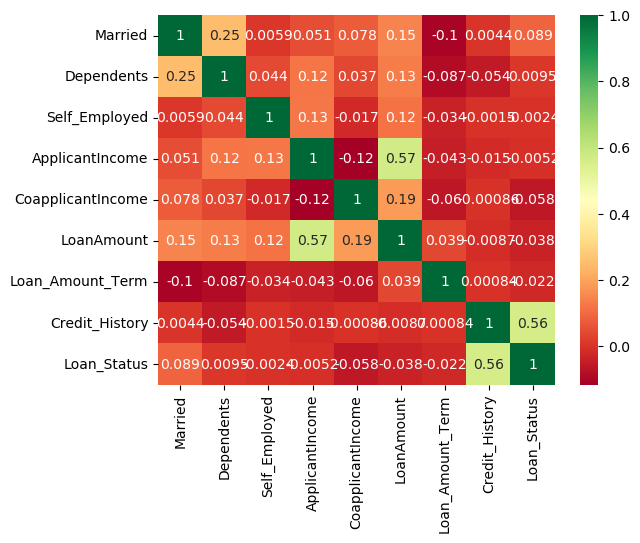

In [48]:
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

In [49]:
#Checking missing values now in our dataset
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             611 non-null    object 
 1   Married            611 non-null    int64  
 2   Dependents         611 non-null    int64  
 3   Education          611 non-null    object 
 4   Self_Employed      611 non-null    int32  
 5   ApplicantIncome    611 non-null    int64  
 6   CoapplicantIncome  611 non-null    float64
 7   LoanAmount         590 non-null    float64
 8   Loan_Amount_Term   597 non-null    float64
 9   Credit_History     561 non-null    float64
 10  Property_Area      611 non-null    object 
 11  Loan_Status        611 non-null    int64  
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 59.7+ KB


In [51]:
df['Loan_Amount_Term'].value_counts()

360.0    511
180.0     44
480.0     14
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
#Majority of entries are 360.0 so we will replace all NaN entires with 360.0
#I could use mean but we have only 14 missing values so I will replace the NaN entries with mode

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0).astype(float)

In [53]:
df['Loan_Amount_Term'].isnull().sum()

0

In [54]:
df['Loan_Amount_Term'].value_counts()

360.0    525
180.0     44
480.0     14
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [55]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
#Replacing 'LoanAmount'
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
128.0    11
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [57]:
#Here I will replace the NaN with the mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['LoanAmount'] = df['LoanAmount'].round() #rounding all numbers

In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,0,5849,0.0,146.0,360.0,1.0,Urban,1
1,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1


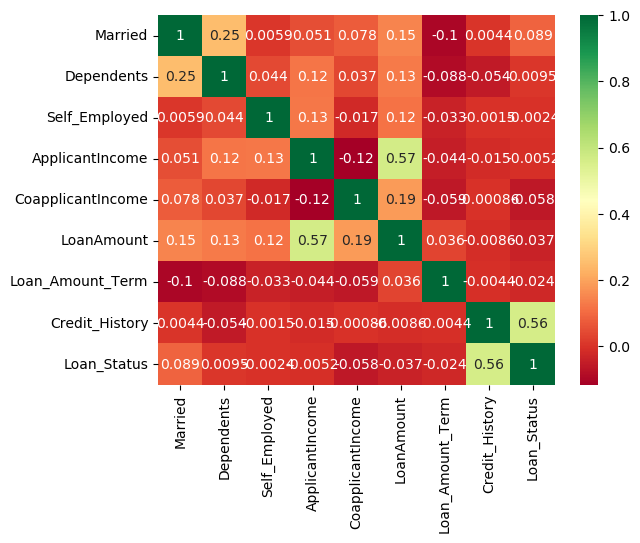

In [59]:
#Credit history is important as we can see from our seaborn heatmap it has a strong correlation with Loan_Status our target variable
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

In [60]:
df['Credit_History'].value_counts()

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [61]:
#filling credit history with mode - 49 missing values
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [62]:
df['Credit_History'].isnull().sum()

0

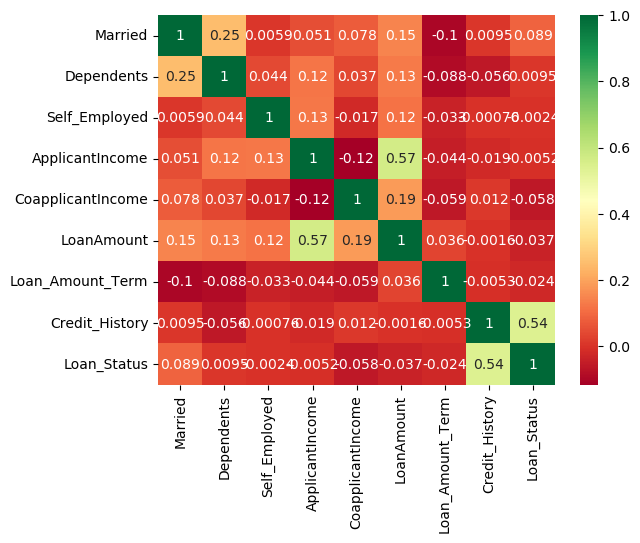

In [63]:
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

In [64]:
#Checking dataframe data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             611 non-null    object 
 1   Married            611 non-null    int64  
 2   Dependents         611 non-null    int64  
 3   Education          611 non-null    object 
 4   Self_Employed      611 non-null    int32  
 5   ApplicantIncome    611 non-null    int64  
 6   CoapplicantIncome  611 non-null    float64
 7   LoanAmount         611 non-null    float64
 8   Loan_Amount_Term   611 non-null    float64
 9   Credit_History     611 non-null    float64
 10  Property_Area      611 non-null    object 
 11  Loan_Status        611 non-null    int64  
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 59.7+ KB


In [65]:
#Mapping our object data to intgers 0 and 1 for 'Gender', 'Education' and 0,1,2 for'Property Area'
#Change data type of the column

In [66]:
#'Education'

df['Education'].value_counts()

Graduate        477
Not Graduate    134
Name: Education, dtype: int64

In [67]:
edmap = {'Not Graduate':0, 'Graduate':1} 

df['Education'] = df['Education'].map(edmap)

In [68]:
df['Education'].head()

0    1
1    1
2    1
3    0
4    1
Name: Education, dtype: int64

In [69]:
df['Education'].dtype

dtype('int64')

In [70]:
#'Gender'
df['Gender'].value_counts()

Male      500
Female    111
Name: Gender, dtype: int64

In [71]:
genmap = {'Female':0, 'Male':1} 

df['Gender'] = df['Gender'].map(genmap)

In [72]:
df['Gender'].dtype

dtype('int64')

In [73]:
df['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [74]:
#'Property Area'
df['Property_Area'].value_counts()

Semiurban    231
Urban        201
Rural        179
Name: Property_Area, dtype: int64

In [75]:
propmap = {'Semiurban':0, 'Urban':1,'Rural':2}

df['Property_Area'] = df['Property_Area'].map(propmap)

In [76]:
df['Property_Area'].head()

0    1
1    2
2    1
3    1
4    1
Name: Property_Area, dtype: int64

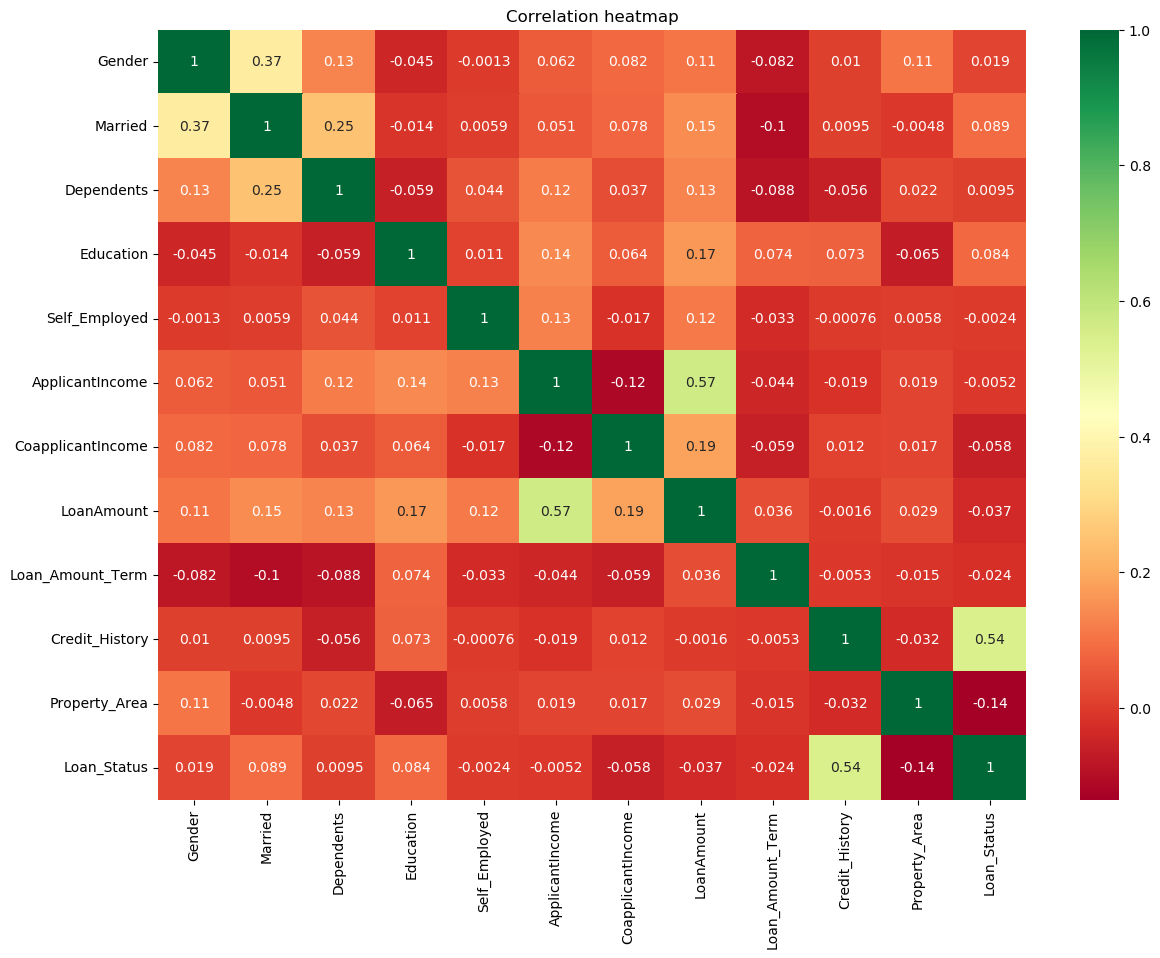

In [77]:
#Let's run our seaborn heatmap again and check if we can perform Principal Component Analysis and remove independent variables not required
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

plt.title('Correlation heatmap')
plt.show()

In [78]:
#Property Area has a little to no correlation on our target variable - I will drop this column
df = df.drop('Property_Area',axis=1)

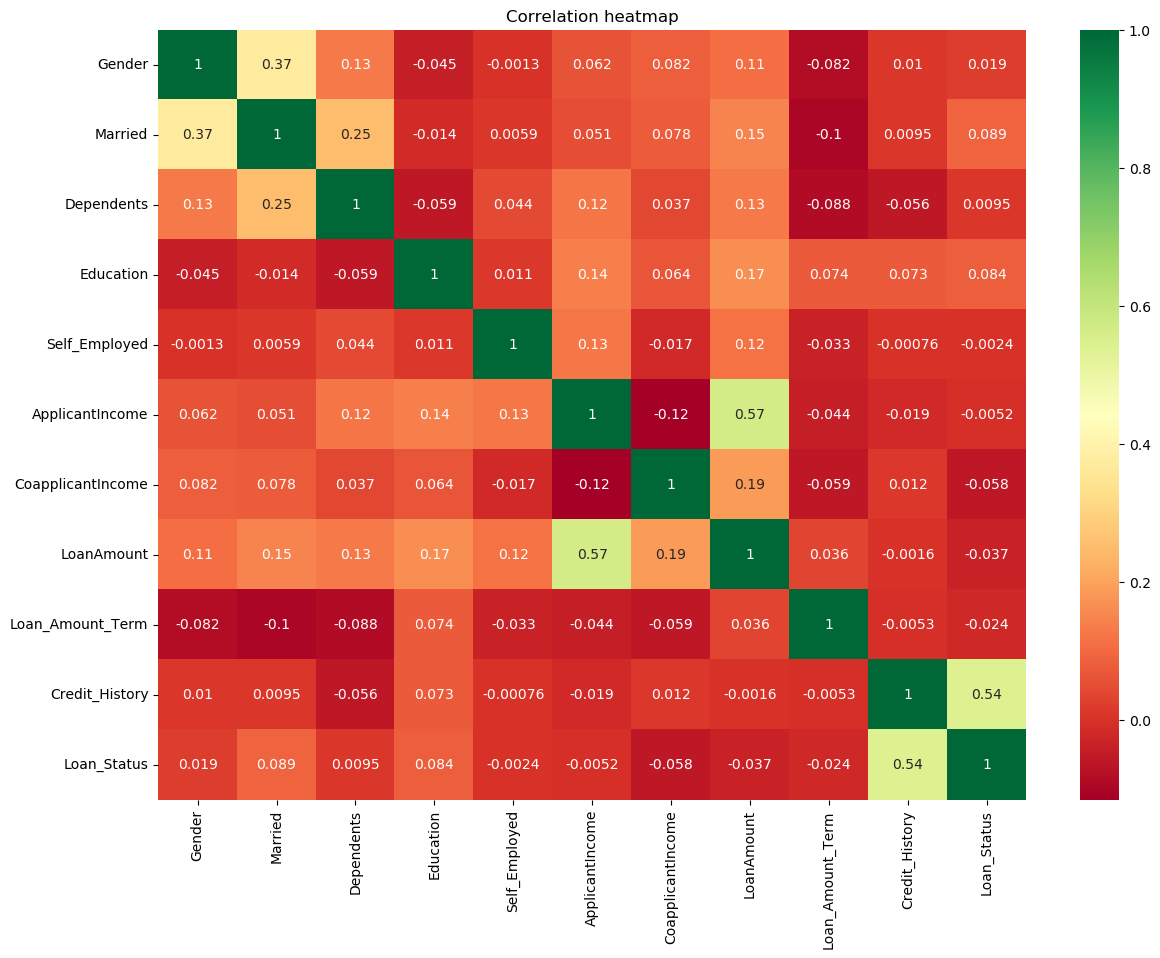

In [79]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

plt.title('Correlation heatmap')
plt.show()

In [80]:
#Scaling our data - some loan amounts and Income might be a lot bigger than others in our dataset - which could lead to bias
#I will check the min and max range and decide if I should scale our data between 0 and 1

df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,0.818331,0.651391,1.003273,0.780687,0.134206,5399.513912,1627.972046,146.356792,342.324059,0.854337,0.685761
std,0.385888,0.476920,1.714926,0.414120,0.341153,6120.764249,2931.747971,84.240777,64.208419,0.353057,0.464592
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2875.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3800.000000,1213.000000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5790.000000,2304.000000,165.000000,360.000000,1.000000,1.000000
max,1.000000,1.000000,9.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [81]:
#After review the data, we can see that 'Applicant Income', 'Loan_Term_amount' and 'CoapplicantIncome' hav a high standard deviation and could affect our models results
#Lets scale our data between 0 and 1
#we will use the MinMaxScaler class from sklearn module

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #create an instance of MinMaxScaler class

#Split our data into X and Y variables - independent and dependent (target) variables 

X = df.drop('Loan_Status',axis=1) #dropping 'Loan_Status from X - independent varibales 
y = df['Loan_Status'] #Target Variable
#scale our data - will return a numpy array
df_scale = scaler.fit_transform(X)

#Convert back to a Dataframe
df_scaled = pd.DataFrame(df_scale,columns=X.columns)

In [83]:
df_scaled.head() #the data is now scaled between 0 and 1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198263,0.74359,1.0
1,1.0,1.0,0.111111,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0
2,1.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0
3,1.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0


In [84]:
df_scaled.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,0.818331,0.651391,0.111475,0.780687,0.134206,0.064929,0.039071,0.198780,0.705821,0.854337
std,0.385888,0.476920,0.190547,0.414120,0.341153,0.075705,0.070361,0.121911,0.137197,0.353057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.033711,0.000000,0.131693,0.743590,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.045145,0.029112,0.172214,0.743590,1.000000
75%,1.000000,1.000000,0.111111,1.000000,0.000000,0.069759,0.055296,0.225760,0.743590,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#Lets confirm that we have no more object data types in our dataset  -- this should return 0
categor = [i for i in df_scaled.columns if df[i].dtype == 'O']

print(f'We have {len(categor)} in our dataset')

We have 0 in our dataset


In [86]:
#Checking if our Target variable is balanced - this shows the majority of Target values are 1
#Let's check class distribution
#419/611 = 68.6% for 1
#192/611 = 31.4 for 0
#Our dataset is not massively imbalanced so I will
df['Loan_Status'].value_counts()

1    419
0    192
Name: Loan_Status, dtype: int64

LOGISTIC REGRESSION (Sigmoid Function)